# Modeling

In [271]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.decomposition import PCA

In [272]:
X = pd.read_csv('data/data_for_modeling.csv')

In [273]:
X.columns

Index(['Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_1-Sty Twnhm Condo',
       'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market

## Linear regression model
1. Do we need to standardize the variables? No. In general, you do not need to center or standardize your data for multiple regression. Different explanatory variables are almost always on different scales (i.e., measured in different units). This is not a problem; the betas are estimated such that they convert the units of each explanatory variable into the units of the response variable appropriately. 

In [274]:
Y = X['Time Adjust Sales Price']
Y.shape

(26837,)

In [276]:
features = X.loc[:,['Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF', 'Unincorporated', 'Quality_cat',
       'Garage Attached', 'Design_1 Sty Townh', 'Design_1-Sty Twnhm Condo',
       'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area_630',
       'Market Area_632', 'Market Area_633', 'Market Area_634' ]]

In [277]:
features.head()
X_train_const = sm.add_constant(features)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75)

In [279]:
print(X_train.shape)
print(X_test.columns)

(20127, 49)
Index(['const', 'Eff Yr Built', 'Above Grd SF', 'Basemt Tot SF',
       'Basemt Fin SF', 'Garage SF', 'Est Land SF', 'Unincorporated',
       'Quality_cat', 'Garage Attached', 'Design_1 Sty Townh',
       'Design_1-Sty Twnhm Condo', 'Design_Bi Level', 'Design_Det 1 Sty Condo',
       'Design_Det Mult Sty Condo', 'Design_Modular', 'Design_Multi Sty',
       'Design_Multi Sty Condo', 'Design_Multi Sty Townh',
       'Design_Mutli Sty Twnhm Condo', 'Design_Paired', 'Design_Patio',
       'Design_Ranch', 'Design_Split level', 'Market Area_101',
       'Market Area_102', 'Market Area_103', 'Market Area_104',
       'Market Area_105', 'Market Area_106', 'Market Area_107',
       'Market Area_108', 'Market Area_109', 'Market Area_401',
       'Market Area_402', 'Market Area_403', 'Market Area_404',
       'Market Area_405', 'Market Area_407', 'Market Area_501',
       'Market Area_502', 'Market Area_503', 'Market Area_505',
       'Market Area_506', 'Market Area_507', 'Market Area

In [280]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [281]:
results

In [282]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.767
Model:                                 OLS   Adj. R-squared:                  0.767
Method:                      Least Squares   F-statistic:                     1439.
Date:                     Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                             13:49:14   Log-Likelihood:            -2.7605e+05
No. Observations:                    20127   AIC:                         5.522e+05
Df Residuals:                        20080   BIC:                         5.526e+05
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.719e+06   2.55e+05    -10.669      0.000   -3.22e+06   -2.22e+06
Eff Yr Built                  1578.2940    140.776     11.211      0.000    1302.361    1854.227
Above Grd SF                   178.1255      3.858     46.172      0.000     170.564     185.687
Basemt Tot SF                  -22.6650      4.195     -5.402      0.000     -30.888     -14.442
Basemt Fin SF                   98.3176      4.038     24.346      0.000      90.402     106.233
Garage SF                       48.7026      3.542     13.751      0.000      41.760      55.645
Est Land SF                      1.8996      0.128     14.819      0.000       1.648       2.151
Unincorporated                7.867e+04   1.01e+04      7.797      0.000    5.89e+04    9.85e+04
Quality_cat                    6.19e+04   1167.552     53.016      0.000    5.96e+04    6.42e+04
Garage Attached              -6.603e+04   4642.703    -14.222      0.000   -7.51e+04   -5.69e+04
Design_1 Sty Townh           -1.412e+05   3.57e+04     -3.956      0.000   -2.11e+05   -7.13e+04
Design_1-Sty Twnhm Condo      4.256e+04   1.76e+04      2.414      0.016    8005.641    7.71e+04
Design_Bi Level              -3.382e+04   2.18e+04     -1.549      0.121   -7.66e+04    8964.317
Design_Det 1 Sty Condo        5.037e+04   9.84e+04      0.512      0.609   -1.42e+05    2.43e+05
Design_Det Mult Sty Condo     2.436e+05   4.56e+04      5.338      0.000    1.54e+05    3.33e+05
Design_Modular                -1.41e+05   8.47e+04     -1.664      0.096   -3.07e+05    2.51e+04
Design_Multi Sty             -1.384e+05   2.02e+04     -6.851      0.000   -1.78e+05   -9.88e+04
Design_Multi Sty Condo        5.093e+04   9282.197      5.487      0.000    3.27e+04    6.91e+04
Design_Multi Sty Townh       -1.799e+05   3.28e+04     -5.478      0.000   -2.44e+05   -1.16e+05
Design_Mutli Sty Twnhm Condo  3.171e+04      1e+04      3.160      0.002     1.2e+04    5.14e+04
Design_Paired                -1.492e+05   2.48e+04     -6.015      0.000   -1.98e+05   -1.01e+05
Design_Patio                 -1.753e+05   2.59e+04     -6.758      0.000   -2.26e+05   -1.24e+05
Design_Ranch                 -8.328e+04   1.99e+04     -4.191      0.000   -1.22e+05   -4.43e+04
Design_Split level           -5.043e+04   2.06e+04     -2.451      0.014   -9.08e+04   -1.01e+04
Market Area_101               7.922e+05   1.44e+04     54.912      0.000    7.64e+05     8.2e+05
Market Area_102               2.191e+05   1.42e+04     15.445      0.000    1.91e+05    2.47e+05
Market Area_103               5.424e+05   1.43e+04     37.994      0.000    5.14e+05     5.7e+05
Market Area_104               5.654e+04   1.71e+04      3.298      0.001    2.29e+04    9.01e+04
Market Area_105      

T-stats look good for all coefficients except unincorporated. https://bouldercounty.gov/government/about-boulder-county/unincorporated-towns/

The Durbin-Watson is right around 2 and between 1.5 and 2.5, so autocorrelation is likely not a cause for concern.
R squared is better than with scaled variables so definitely don't need it. 

In [283]:
residuals = np.asarray(y_test - results.predict(X_test))

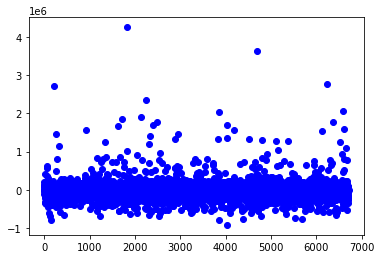

In [284]:
plt.plot(residuals, 'bo')
plt.show()

Now let's look at the residual's qqplot. 

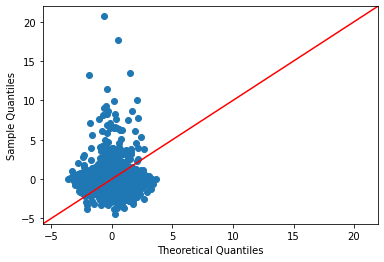

In [289]:

residuals.shape
reshaped =np.reshape(residuals, (-1, 1))
scaler = StandardScaler()
scaler.fit(reshaped)
stand_resid =scaler.transform(reshaped)
fig = sm.qqplot(stand_resid, line='45')
plt.show()

Residuals do not seem to be normally distributed. 

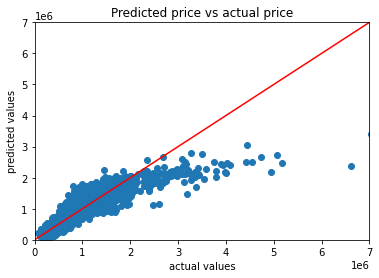

In [290]:
# Plot the predictions
plt.figure()

# Build a scatterplot

x = np.linspace(0,7000000,)
plt.plot(x,x, color = 'r')
plt.ylim((0,7000000))
plt.xlim((0,7000000))
plt.scatter(y_test, results.predict(X_test))

# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price')
plt.show()

Clearly, there is a problem. The second half of the dataset where the problems start showing are the expensive properties, which are hard to model using given variables. 

### Decision tree

In [291]:
X_test = X_test.iloc[:,1:]


In [292]:
X_train =X_train.iloc[:,1:]

### PCA

In [293]:
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X_train)
Scaled_data=scaling.transform(X_train)
 
# Set the n_components=3
principal=PCA(n_components=15)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(20127, 15)


In [294]:
#Check the values of eigen vectors
# prodeced by principal components
principal.components_[0]

array([ 0.26545179,  0.41957706,  0.39089682,  0.24454838,  0.02776368,
        0.16023009,  0.02386419,  0.33815641,  0.2883047 , -0.02040202,
       -0.06257945, -0.02501028, -0.00724117, -0.00899089, -0.00754926,
        0.32632375, -0.13214661, -0.0888161 , -0.10107366,  0.02219718,
        0.0138066 , -0.01684582, -0.02365838,  0.01058563,  0.06136216,
        0.04982463, -0.03278594,  0.00353986, -0.0015115 , -0.0083416 ,
       -0.06038457, -0.03627182,  0.05479591,  0.08702266,  0.0340834 ,
        0.1365017 ,  0.08275892, -0.03951563,  0.08775909, -0.07111385,
        0.13381131,  0.04039241, -0.05083426,  0.06953643, -0.21940357,
       -0.12918335, -0.10786241, -0.01537119])

Text(0, 0.5, 'pc2')

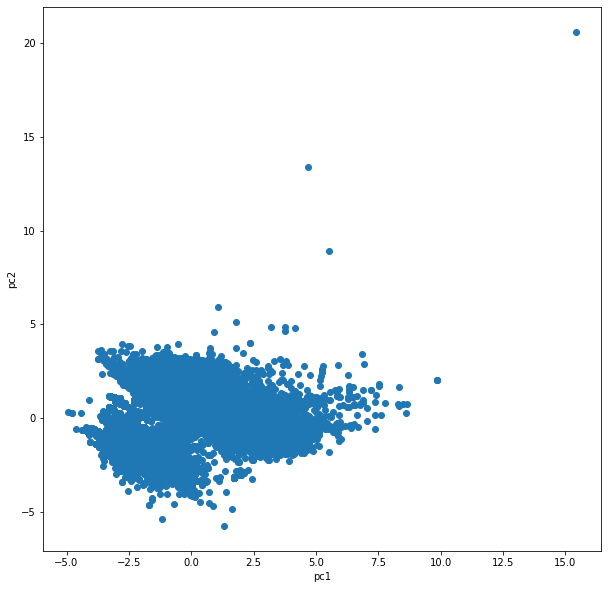

In [295]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1])

plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

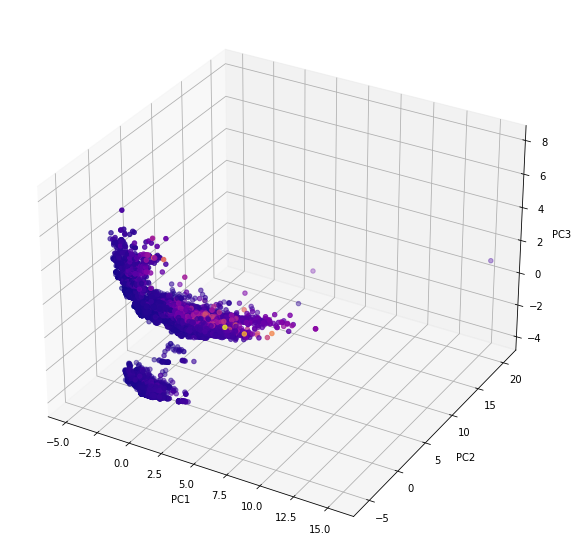

In [296]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=y_train, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [297]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.08608134 0.04876196 0.04551682 0.03904477 0.03224036 0.02947616
 0.02792109 0.02737608 0.02586482 0.02411473 0.02350286 0.02316088
 0.02290963 0.02247173 0.02214049]


Well, it looks like first 3 components don't explain much of the variance, certainly not around 80% level. I would not use them in this case and instead use 

#### Model 1: Entropy model - no max_depth

In [299]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeRegressor()

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred =pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeRegressor()

[Text(0.8969754139878519, 0.9857142857142858, 'X[14] <= 7.5\nsquared_error = 317661431734.185\nsamples = 8030\nvalue = 893946.755'),
 Text(0.802822322932522, 0.9571428571428572, 'X[14] <= 5.5\nsquared_error = 123509676748.396\nsamples = 7534\nvalue = 806246.85'),
 Text(0.690559793902034, 0.9285714285714286, 'X[16] <= 0.5\nsquared_error = 76721786410.942\nsamples = 5996\nvalue = 731533.17'),
 Text(0.6556329871437317, 0.9, 'X[18] <= 0.5\nsquared_error = 57440546739.791\nsamples = 5730\nvalue = 705983.613'),
 Text(0.6084095326806946, 0.8714285714285714, 'X[21] <= 0.5\nsquared_error = 48485723053.486\nsamples = 5515\nvalue = 688864.474'),
 Text(0.5591659418435817, 0.8428571428571429, 'X[22] <= 0.5\nsquared_error = 40975466754.722\nsamples = 5166\nvalue = 667790.02'),
 Text(0.4971628032358373, 0.8142857142857143, 'X[17] <= 0.5\nsquared_error = 32095670890.028\nsamples = 4904\nvalue = 649217.186'),
 Text(0.4046503878718855, 0.7857142857142857, 'X[20] <= 0.5\nsquared_error = 21454302950.674\n

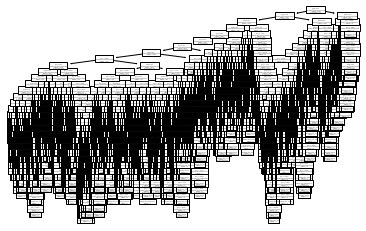

In [127]:
tree.plot_tree(entr_model)

In [300]:
R2 = 1 - (np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
print(R2)

0.6431890661331969


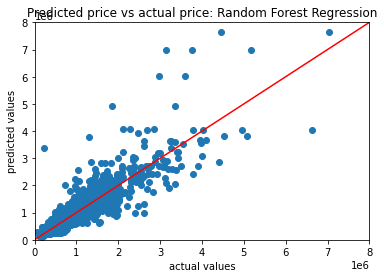

In [301]:

# Plot the predictions
plt.figure()

# Build a scatterplot

x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'r')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, y_pred)

# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price: Random Forest Regression')
plt.show()


R squared 0f 0.643 vs 0.741 for linear regression - not an improvement. However, it does look like the model mistreats everyone equally. 

### Polynomial regression

In [303]:
# Fitting Linear Regression to the dataset
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [304]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2, interaction_only=False)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train )

lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [305]:
X_poly.shape

(20127, 1225)

In [306]:
X_poly

array([[1.000e+00, 2.017e+03, 1.661e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.005e+03, 4.872e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.955e+03, 8.500e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.986e+03, 2.402e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.986e+03, 1.331e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.998e+03, 1.278e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [307]:
polynom = lin2.predict(poly.fit_transform(X_test)) # predict on the test set

In [308]:
polynom

array([ 405624.6667788 ,  384660.90535685,  698470.4663534 , ...,
        408196.94356231, 1166828.77052905,  694986.07980251])

In [309]:
R2 = 1 - (np.sum((y_test-polynom)**2)/np.sum((y_test-np.mean(y_test))**2))
print(R2)

0.8579864077901598


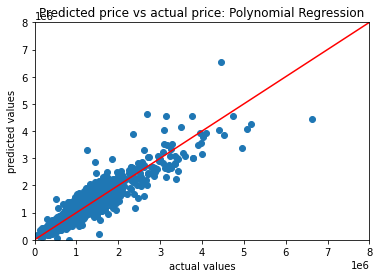

In [310]:

# Plot the predictions
plt.figure()

# Build a scatterplot

x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'r')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, polynom)

# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price: Polynomial Regression')
plt.show()



Well it looks like polynomial regression did a great job, with R^2 at 0.869 versus 0.643 for Descision tree and 0.767 for linear regression. To check for overfitting, I would like to calculate R2 on train set to see the difference between test and train set. 

In [311]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set

In [312]:
poly_train = lin2.predict(poly.fit_transform(X_train)) # predict on the test set
R2 = 1 - (np.sum((y_train-poly_train)**2)/np.sum((y_train-np.mean(y_train))**2))
print(R2)

0.9119281284639635


Well R2 on train set is 0.912 and R2 on test set is 0.858, so there's some overfitting going on. Let's do predictions vs actuals plot

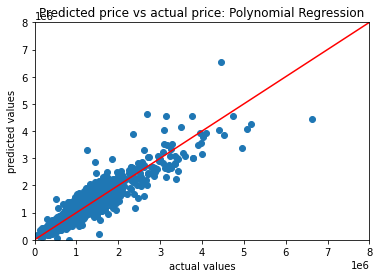

In [313]:
# Plot the predictions
plt.figure()

# Build a scatterplot

x = np.linspace(0,8000000,)
plt.plot(x,x, color = 'r')
plt.ylim((0,8000000))
plt.xlim((0,8000000))
plt.scatter(y_test, polynom)

# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price: Polynomial Regression')
plt.show()




Well this looks much much better, however the 3 million dollars and up the relationship doesn't seem to hold up as well, but those observations are not very numerous. I would like to investigate them and see what could drive that.  

## Multiple linear regression model with log transformed response

https://statmodeling.stat.columbia.edu/2019/08/21/you-should-usually-log-transform-your-positive-data/

From page 59:

It commonly makes sense to take the logarithm of outcomes that are all-positive.

If a variable has a narrow dynamic range (that is, if the ratio between the high and low values is close to 1), then it will not make much of a difference in fit if the regression is on the logarithmic or the original scale. . . . In such a situation, it might seem to make sense to stay on the original scale for reasons of simplicity. However, the logarithmic transformation can make sense even here, because coefficients are often more easily understood on the log scale. . . . For an input with a larger amount of relative variation (for example, heights of children, or weights of animals), it would make sense to work with its logarithm immediately, both as an aid in interpretation and likely an improvement in fit too.

In [315]:
# log 10 transform y_test and y_train

from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)
y_test_log = transformer.transform(y_test)

In [316]:
lin2 = LinearRegression()
reg = lin2.fit(X_train, y_train_log)


In [317]:
log_test = reg.predict(X_test) # predict on the test set
R2 = 1 - (np.sum((y_test_log-log_test)**2)/np.sum((y_test_log-np.mean(y_test_log))**2))
print("Test set R^2: ",R2)

log_train = reg.predict(X_train) # predict on the test set
R2 = 1 - (np.sum((y_train_log-log_train)**2)/np.sum((y_train_log-np.mean(y_train_log))**2))
print("Train set R^2: ",R2)


Test set R^2:  0.8954735386099824
Train set R^2:  0.894417409707682


In [320]:
print(
np.min(y_test_log),
np.max(y_test_log))

4.798400385677952 6.846646648554174


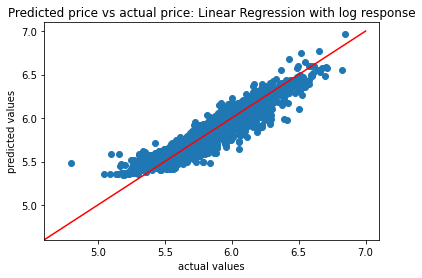

In [323]:
# Plot the predictions
plt.figure()

# Build a scatterplot
x = np.linspace(4,7,)
plt.plot(x,x, color = 'r')

plt.scatter(y_test_log, log_test )
plt.xlim(4.6,7.1)
plt.ylim(4.6,7.1)


# Label it nicely
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predicted price vs actual price: Linear Regression with log response')
plt.show()

Test set R^2:  0.8954735386099824 <br>Train set R^2:  0.894417409707682. No overfitting at all. Let's confirm with cross-validation

### Refit the model with stats models to get the summary output

In [325]:
X_train_const = sm.add_constant(features)
X_train, X_test, y_train, y_test = train_test_split(X_train_const, Y, test_size = 0.25, train_size = 0.75)
transformer = FunctionTransformer(np.log10)
y_train_log  = transformer.transform(y_train)

In [326]:
X_train.shape

(20127, 49)

In [327]:
model = sm.OLS(y_train_log,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time Adjust Sales Price   R-squared:                       0.894
Model:                                 OLS   Adj. R-squared:                  0.894
Method:                      Least Squares   F-statistic:                     3691.
Date:                     Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                             13:58:47   Log-Likelihood:                 25092.
No. Observations:                    20127   AIC:                        -5.009e+04
Df Residuals:                        20080   BIC:                        -4.972e+04
Df Model:                               46                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7350      0.080     21.732      0.000       1.579       1.891
Eff Yr Built                     0.0018   4.41e-05     40.864      0.000       0.002       0.002
Above Grd SF                  7.692e-05   1.22e-06     62.938      0.000    7.45e-05    7.93e-05
Basemt Tot SF                 2.503e-06   1.33e-06      1.881      0.060   -1.05e-07    5.11e-06
Basemt Fin SF                 3.098e-05   1.28e-06     24.176      0.000    2.85e-05    3.35e-05
Garage SF                     3.842e-05   1.13e-06     33.936      0.000    3.62e-05    4.06e-05
Est Land SF                    7.04e-07   4.14e-08     17.024      0.000    6.23e-07    7.85e-07
Unincorporated                   0.0420      0.003     13.088      0.000       0.036       0.048
Quality_cat                      0.0255      0.000     69.529      0.000       0.025       0.026
Garage Attached                 -0.0167      0.001    -11.390      0.000      -0.020      -0.014
Design_1 Sty Townh               0.1498      0.012     12.802      0.000       0.127       0.173
Design_1-Sty Twnhm Condo         0.0758      0.006     12.969      0.000       0.064       0.087
Design_Bi Level                  0.2184      0.007     31.727      0.000       0.205       0.232
Design_Det 1 Sty Condo           0.0751      0.029      2.634      0.008       0.019       0.131
Design_Det Mult Sty Condo        0.1474      0.013     11.371      0.000       0.122       0.173
Design_Modular                   0.0544      0.024      2.311      0.021       0.008       0.100
Design_Multi Sty                 0.1892      0.006     29.829      0.000       0.177       0.202
Design_Multi Sty Condo           0.0583      0.003     19.715      0.000       0.053       0.064
Design_Multi Sty Townh           0.1423      0.011     13.089      0.000       0.121       0.164
Design_Mutli Sty Twnhm Condo     0.0715      0.003     22.703      0.000       0.065       0.078
Design_Paired                    0.1695      0.008     21.682      0.000       0.154       0.185
Design_Patio                     0.1908      0.008     23.066      0.000       0.175       0.207
Design_Ranch                     0.2125      0.006     34.101      0.000       0.200       0.225
Design_Split level               0.2143      0.006     33.216      0.000       0.202       0.227
Market Area_101                  0.3693      0.005     79.738      0.000       0.360       0.378
Market Area_102                  0.2040      0.005     45.018      0.000       0.195       0.213
Market Area_103                  0.2937      0.005     64.494      0.000       0.285       0.303
Market Area_104                  0.1759      0.006     31.681      0.000       0.165       0.187
Market Area_105      

All variables are significant except market areas 501 and 505. Durbin Watson is great.  R^2 is 0.894. <br>
However, there is an interesting thing going on with the coefficient values. 
Largest coefficients are for Market Areas ranging from -0.13 to 0.29, meaning being in a certain market area increases the value by 29% or decreases by 0.11%. <br>
All positive, but very small increases for year built and square footage variables.<br>
Extra 1000 SF of the house yields 8% increase in value.<br>
Extra 1000 SF increase in finished basement yields 3.1% in value.<br>
Extra 1000SF of garage yields 3.8% of value.<br>
Unfinished basement yields only 0.31% of the price increase.<br>
And one year of the house yields 0.2%
<br>
One level increase in quality leads to 2.55% increase in price. <br>




### Performing 6-fold cross validation on the linear regression with log response model

In [328]:
y_log  = transformer.transform(Y)

In [329]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, features, y_log, cv=kf)

# Print scores
print(cv_scores)

# Print the mean
print("Mean R^2: ",np.mean(cv_scores))

# Print the standard deviation
print("Standard deviation R^2: ",np.std(cv_scores))

# Print the 95% confidence interval
print(np.percentile(cv_scores, [2.5, 97.5]))


[0.89109375 0.89944565 0.87648998 0.89703234 0.89801589 0.89608386]
Mean R^2:  0.8930269133272208
Standard deviation R^2:  0.007838852214960092
[0.87831546 0.89926693]


The model is extremely robust to random withholding of data, which means there is not much overfitting!